# VEHICLE DATA EDA + CLEANING

## The aim of this Notebook is clean and do an EDA of the Dataset

## Checklist rapida – EDA + Cleaning

### EDA
- [ ] Panoramica dati (`shape`, `dtypes`, `head`)
- [ ] Statistiche descrittive (num e cat)
- [ ] Analisi missing values
- [ ] Distribuzione target (`price`) + valutare log-transform
- [ ] Distribuzioni e correlazioni variabili numeriche
- [ ] Analisi variabili categoriche (frequenze, boxplot vs `price`)

### Cleaning
- [ ] Gestione valori mancanti
- [ ] Trattamento outlier
- [ ] Definizione `num_cols` e `cat_cols`
- [ ] Salvataggio `vehicles_clean.csv`



In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option("display.float_format", lambda x: f"{x:,.3f}")


In [37]:
# Load file csv
csv_path = "../Dataset/car data.csv"

df = pd.read_csv(csv_path)
print("Shape: ",df.shape,"\n")
print("---")
print("Types of Data: \n",df.dtypes)
print("---")
print("Head of dataset: \n",df.head())


Shape:  (301, 9) 

---
Types of Data: 
 Car_Name          object
Year               int64
Selling_Price    float64
Present_Price    float64
Kms_Driven         int64
Fuel_Type         object
Seller_Type       object
Transmission      object
Owner              int64
dtype: object
---
Head of dataset: 
   Car_Name  Year  Selling_Price  Present_Price  Kms_Driven Fuel_Type  \
0     ritz  2014          3.350          5.590       27000    Petrol   
1      sx4  2013          4.750          9.540       43000    Diesel   
2     ciaz  2017          7.250          9.850        6900    Petrol   
3  wagon r  2011          2.850          4.150        5200    Petrol   
4    swift  2014          4.600          6.870       42450    Diesel   

  Seller_Type Transmission  Owner  
0      Dealer       Manual      0  
1      Dealer       Manual      0  
2      Dealer       Manual      0  
3      Dealer       Manual      0  
4      Dealer       Manual      0  


In [38]:
# standardize all the names of columns
df.columns = (
    df.columns.str.strip()
              .str.lower()
              .str.replace(r"\s+", "_", regex=True)
              .str.replace(r"[^0-9a-zA-Z_]", "", regex=True)
)
df.head(2)


,car_name,year,selling_price,present_price,kms_driven,fuel_type,seller_type,transmission,owner
0,ritz,2014,3.350,5.590,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.750,9.540,43000,Diesel,Dealer,Manual,0


In [39]:
# Numeric Stats
df.describe()

# Statistiche categoriche
for col in ["fuel_type", "seller_type", "transmission"]:
    print(f"\n{col} value counts:")
    print(df[col].value_counts())



fuel_type value counts:
fuel_type
Petrol    239
Diesel     60
CNG         2
Name: count, dtype: int64

seller_type value counts:
seller_type
Dealer        195
Individual    106
Name: count, dtype: int64

transmission value counts:
transmission
Manual       261
Automatic     40
Name: count, dtype: int64


In [40]:
# Check if there are Nan value and if there are check how
df.isna().sum()


car_name         0
year             0
selling_price    0
present_price    0
kms_driven       0
fuel_type        0
seller_type      0
transmission     0
owner            0
dtype: int64

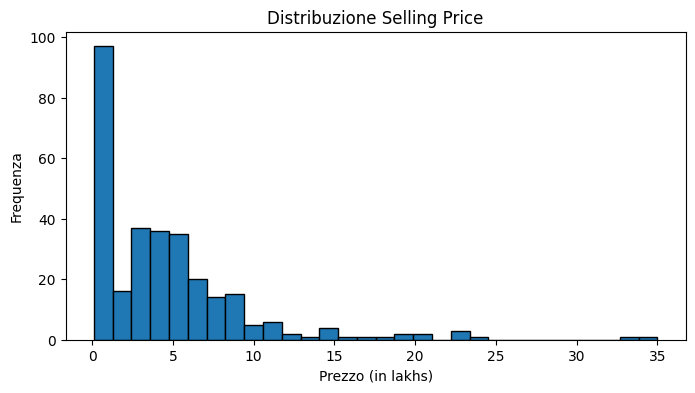

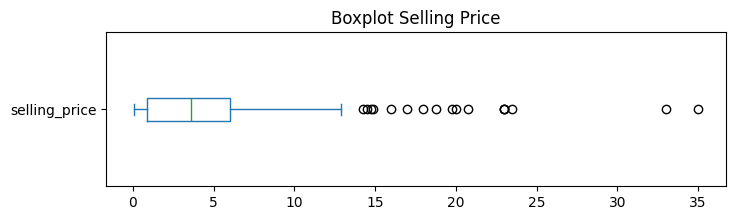

In [41]:
plt.figure(figsize=(8,4))
plt.hist(df["selling_price"], bins=30, edgecolor="black")
plt.title("Distribuzione Selling Price")
plt.xlabel("Prezzo (in lakhs)")
plt.ylabel("Frequenza")
plt.show()

# Boxplot per outlier
plt.figure(figsize=(8,2))
df["selling_price"].plot(kind="box", vert=False)
plt.title("Boxplot Selling Price")
plt.show()


In [42]:
num_cols = ["year", "present_price", "kms_driven", "owner", "selling_price"]
# Correlazioni
df[num_cols].corr()


,year,present_price,kms_driven,owner,selling_price
year,1.000,-0.048,-0.524,-0.182,0.236
present_price,-0.048,1.000,0.204,0.008,0.879
kms_driven,-0.524,0.204,1.000,0.089,0.029
owner,-0.182,0.008,0.089,1.000,-0.088
selling_price,0.236,0.879,0.029,-0.088,1.000


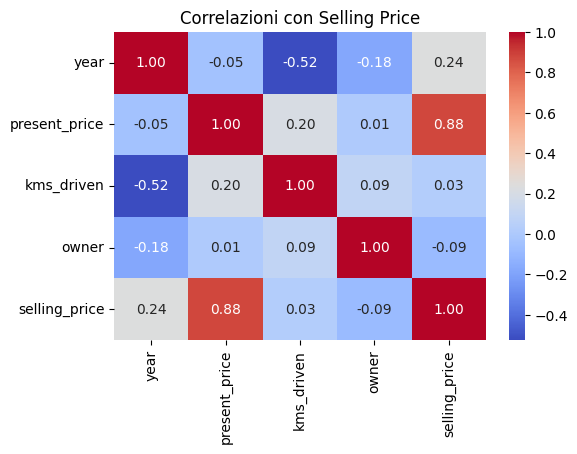

In [43]:
plt.figure(figsize=(6,4))
sns.heatmap(df[num_cols].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlazioni con Selling Price")
plt.show()


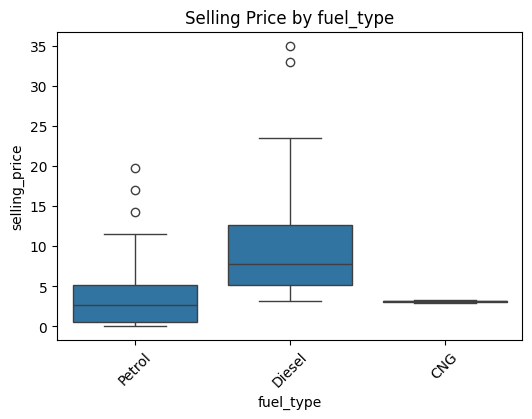

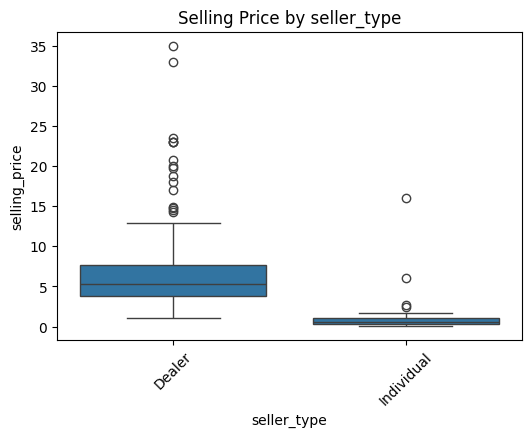

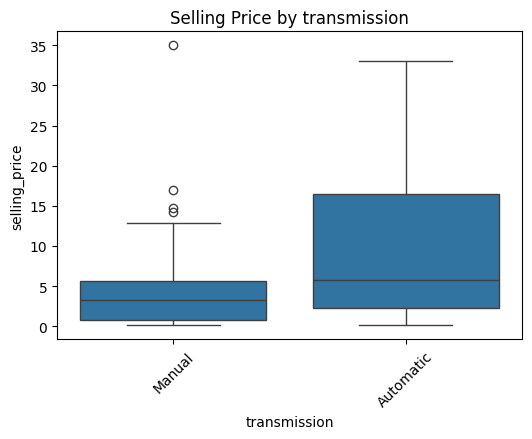

In [44]:
for col in ["fuel_type", "seller_type", "transmission"]:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=col, y="selling_price", data=df)
    plt.title(f"Selling Price by {col}")
    plt.xticks(rotation=45)
    plt.show()
